# CAPSTONE PROJECT - THE BATTLE OF NEIGHBORHOODS - WEEK 2 - REPORT
___

## TABLE OF CONTENTS:
___
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

### 1.INTRODUCTION : BUSINESS PROBLEM <a name="introduction"></a>
___

We have already explored New York City and the city of Toronto and segmented and clustered their neighborhoods. Both cities are very diverse and are the financial capitals of their respective countries. One of the ideas would be to compare the neighborhoods of the two cities and determine how similar or dissimilar they are.

And the most important thing is who would be interested in my discussion problem. The answers are the investors who wants to open a restaurant, construct a school or start a company and they want to rent or buy a property estate. The purpose of this project is to help them better understand the Geographical advantages of different districts so that they can have a best choice of all kinds of investments. In addition, the factors on other advantages and disadvantages are considered.

### 2.DATA USED <a name="data"></a>
___
To make good use of the FOURSQUARE API for fetching location data, the labs done for New York / Toronto segmented and clustered neighborhoods might have given good ideas for proceedind further on the problem.

We would highly leverage the FOURSQUARE API location data to solve or execute the problem. Data science problems as given will always target an audience and are meant to help a group of stakeholders / business to solve a problem, so making sure to describe the audience and their confusions as well.

From the results on ___Toronto, ON, Canada___ the lab especially has given some most common venues in each district. The data set is New York City Neighborhood Names. After transforming the data to Json files, it is easy to use Pandas to transform them into DataFrame. Then select the required data columns to appear and get the information we want. Importing Geopy.geocoders library will be used to get the latitude and longitude values of the locations. With the locations it can able to create map and we will have a direct understanding of the neighborhoods and the purposed areas. The Folium library is mainly used to show maps on different requirements , highlighting the different areas with different rainbow colors to show the differene.

Finally, different analysis on Toronto will give us the related better data. With that we could able to guide or suggest our business/stakeholders a perfect place to start a restaurant.

### 3.METHODOLOGY <a name="methodology"></a>
___
_First_ of all, the Foursquare API was utilized because basic geographical location information and particular venues can be explored through Foursquare API. With a specific credentials client ID and secret, the required foursquare data can be accessed.Before which have created a separate account for Foursquare API developer, by creating so we have got Client ID ans Secret for our own account.

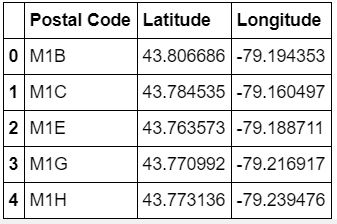

_Second_, Folium is a great visualization library, the map can directly show us the overall shape of the place we want to know. The detailed information on different venues such as restaurants can be seen in a direct way. The investors can have a better understanding of the city of Toronto to choose their properties. People can able to zoom into the above map, and click on each circle mark(highlighted area) to reveal the name of the neighborhood and its respective borough.

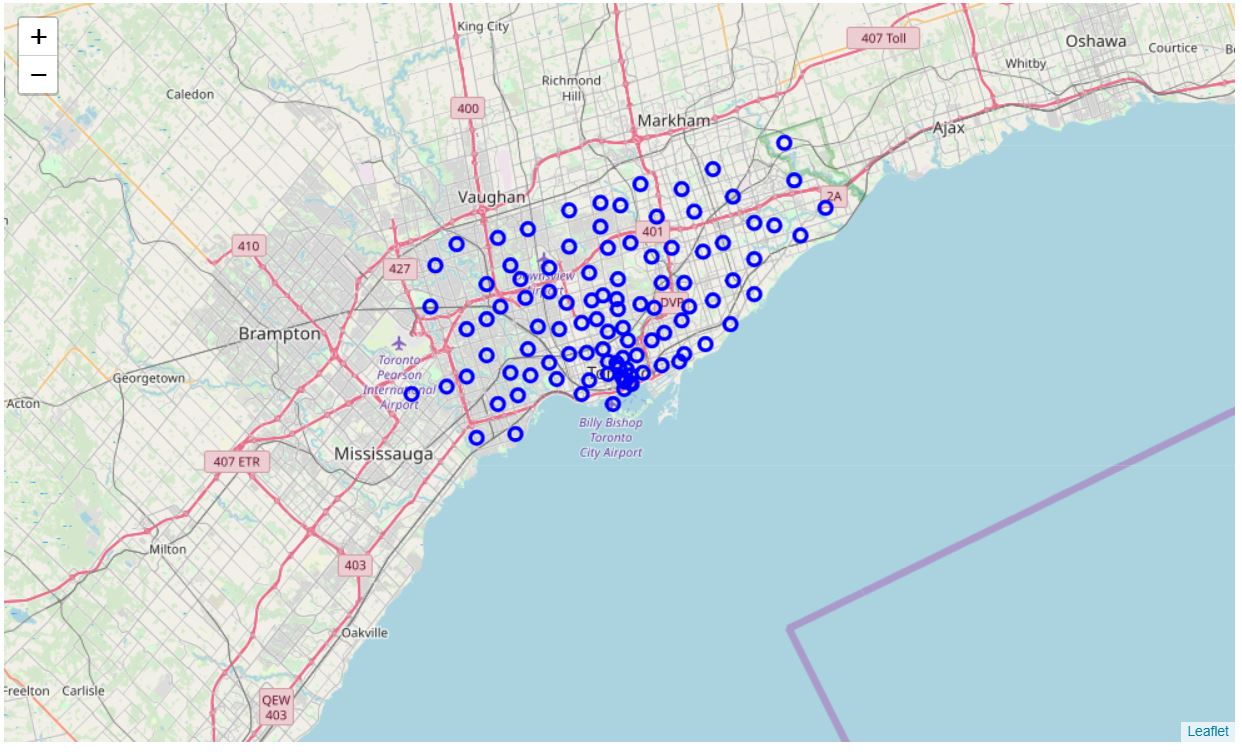

_Third_, Json library is a lightweight data-interchange format. It is easy for larger size file to interpret which can easily handle JSON files. It can simply get interchanged in to XML format to gather information from the tags over there.

_Fourth_, k-means clustering was used. _K-means_ is vastly used for clustering in many data science applications, especially useful if needs to quickly discover insights from unlabeled data. K-means include customer segmentation, understand what the visitors of a website are trying to accomplish, pattern recognition and data compression. This project mainly utilized its data compression application in real world. 

Last but not least, basic _numpy_ and _pandas_ libraries are fundamental methods because dataframes are the basic tool to do any calculations or simulations. Also, some basic python concepts are also utilized.

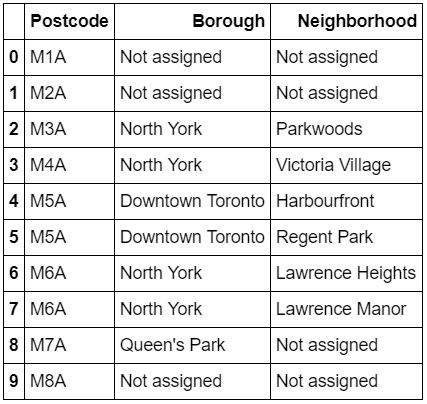

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.19.0-py_0 conda-forge

geographiclib- 100% |################################| Time: 0:00:00  25.29 MB/s
geopy-1.19.0-p 100% |################################| Time: 0:00:00  10.57 MB/s
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  10.35 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  32.19 MB/s
vincent-0.4.4- 100% |###################

_Packages needed for executing our codes are imported.Imported different packages to get , process the data from the source and followed by can able to view the data in the map format_

In [2]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent='capstone_project')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


_We have got the location coordinates using geopy.geocoders_

In [6]:
from bs4 import BeautifulSoup 
import requests 
import bs4

html = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
fsa=requests.get(html)
fsa.raise_for_status()
fsa.encoding=fsa.apparent_encoding
fsa.text

x=fsa.text
soup = BeautifulSoup(x,"lxml")
content = soup.findAll('td')
tables=[]
for data in content:
    tables.append(data.text.strip())
    new_tables=[tables[i:i+3] for i in range(0,len(tables),3)]

_We have created variable 'new__tables' and stored values from XML tags in to it.We have got the data from Wikipedia page using the BeautifulSoup API_

In [7]:
import pandas as pd
column_names = ['Postcode','Borough', 'Neighborhood'] 
neighborhoods =pd.DataFrame(columns=column_names)

_We have imported pandas library and created dataframe with the specified column names._

In [8]:
for x in range(0,289):   
    neighborhoods = neighborhoods.append(
            {'Postcode': new_tables[x][0],
             'Borough': new_tables[x][1],
             'Neighborhood': new_tables[x][2]
            },ignore_index=True)

In [9]:
neighborhoods.head()

,Postcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


_We have copied data from newtables list in to our newly created data frame._

In [10]:
df1=neighborhoods.copy()
df1=df1[~df1['Borough'].isin(['Not assigned'])]

In [11]:
df1['Neighborhood']= df1['Neighborhood'].replace('Not assigned', df1['Borough'])
df1.head()

,Postcode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights


_We have replaced 'Not Assigned' values with Borough values._

In [13]:
d2=df1.groupby(['Postcode','Borough'], as_index=False)
df1=d2.agg(lambda x: ', '.join(x))
df1.head()

,Postcode,Borough,Neighborhood
0,,,
1,M1B,Scarborough,"Rouge, Malvern"
2,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
3,M1E,Scarborough,"Guildwood, Morningside, West Hill"
4,M1G,Scarborough,Woburn


_We have joined the neighborhood data using the same postal code._

In [14]:
df2 = pd.read_csv('http://cocl.us/Geospatial_data')
df2.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


_We have got the coordinates from the package Geospatial Data using the postal code._

In [15]:
df_with_cor = pd.merge(df1, df2, left_on='Postcode', right_on='Postal Code', suffixes=('', '')).drop('Postal Code', 1)
df_with_cor.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


_Now have merged the Neighborhood DF along with the coordinates DF using the postal code as main joining element._

In [16]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough, neighborhood in zip(df_with_cor['Latitude'], df_with_cor['Longitude'], df_with_cor['Borough'], df_with_cor['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill_color='#3186cc',
        fill_opacity=0.7,
    ).add_to(map_toronto)
    
map_toronto

_Folium map has been used here, and the location coordinates been highlighted with blue color_

_We could able to see the great view of the highlighted locations in the Folium Map_

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Postcode Latitude', 
                  'Postcode Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

_The above function has been taken from Foursquare API to facilitate to take the nearby values._

In [18]:
boroughs = set(df_with_cor['Borough'])
toronto_boroughs = {borough for borough in boroughs if 'Toronto' in borough}
toronto_data = df_with_cor[df_with_cor['Borough'].isin(toronto_boroughs)].reset_index(drop=True)
toronto_data.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [19]:
CLIENT_ID = 'ENOVVMOHPTLW3JPRSD2CMPTEEAFCJ1LAWAYRGI4IQ2VEXK2K' # your Foursquare ID
CLIENT_SECRET = 'EVDVD5UC1NOYX0RGZYHMLLOCWJNWLUP1ICOWQU4ZLXQABSYA' # your Foursquare Secret
VERSION = '20190101' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ENOVVMOHPTLW3JPRSD2CMPTEEAFCJ1LAWAYRGI4IQ2VEXK2K
CLIENT_SECRET:EVDVD5UC1NOYX0RGZYHMLLOCWJNWLUP1ICOWQU4ZLXQABSYA


_Have taken my own Foursquare ID, Foursquare Secret from my Foursquare Developer account_

In [20]:
toronto_venues = getNearbyVenues(toronto_data.Neighborhood, toronto_data.Latitude, toronto_data.Longitude)
toronto_venues.head()

,Neighborhood,Postcode Latitude,Postcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
1,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
2,The Beaches,43.676357,-79.293031,Starbucks,43.678798,-79.298045,Coffee Shop
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant


In [21]:
toronto_venues.groupby('Neighborhood').count()

,Postcode Latitude,Postcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",30,30,30,30,30,30
Berczy Park,30,30,30,30,30,30
"Brockton, Exhibition Place, Parkdale Village",22,22,22,22,22,22
Business Reply Mail Processing Centre 969 Eastern,19,19,19,19,19,19
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",14,14,14,14,14,14
"Cabbagetown, St. James Town",30,30,30,30,30,30
Central Bay Street,30,30,30,30,30,30
"Chinatown, Grange Park, Kensington Market",30,30,30,30,30,30
Christie,16,16,16,16,16,16


_We have grouped by and counted down the values of neighborhood._

In [22]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

In [23]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Yoga Studio,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bakery,Bank,Bar,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Dog Run,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Medical Center,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar
0,"Adelaide, King, Richmond",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.000000,0.0,0.0,0.000000,0.0,0.033333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.066667,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.033333,0.0,0.0,0.0,0.000000,0.033333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.033333,0.0,0.0,0.033333,0.0,0.0,0.0,0.033333,0.000000,0.000000,0.033333,0.000000,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.000000,0.0,0.0,0.0,0.000000,0.033333,0.0,0.033333,0.0,0.000000,0.000000,0.000000,0.0,0.033333,0.000000,0.0,0.033333,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.033333,0.0,0.000000,0.0,0.033333,0.0,0.000000,0.033333,0.0,0.0,0.000000,0.0,0.100000,0.0,0.033333,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.0
1,Berczy Park,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0

_Grouped by values have been used above to find the mean of the neighborhood values_

In [24]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
              venue  freq
0        Steakhouse  0.10
1             Hotel  0.07
2              Café  0.07
3  Asian Restaurant  0.07
4       Pizza Place  0.03


----Berczy Park----
                venue  freq
0  Seafood Restaurant  0.07
1        Cocktail Bar  0.07
2              Bakery  0.07
3                Café  0.07
4      Farmers Market  0.07


----Brockton, Exhibition Place, Parkdale Village----
            venue  freq
0  Breakfast Spot  0.09
1     Coffee Shop  0.09
2            Café  0.09
3   Burrito Place  0.05
4         Stadium  0.05


----Business Reply Mail Processing Centre 969 Eastern----
                venue  freq
0         Yoga Studio  0.05
1  Light Rail Station  0.05
2             Butcher  0.05
3          Comic Shop  0.05
4      Farmers Market  0.05


----CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara----
              venue  freq
0  Airport Terminal  0.14
1    Airport Lounge  0.14

_We have used the Cluster value as 5(k=5) to find the best accuracy_

In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] =toronto_grouped['Neighborhood']

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Steakhouse,Asian Restaurant,Café,Hotel,Gastropub,Noodle House,Monument / Landmark,Opera House,Concert Hall,Pizza Place
1,Berczy Park,Farmers Market,Cocktail Bar,Seafood Restaurant,Bakery,Café,Breakfast Spot,Restaurant,Pub,Bistro,Belgian Restaurant
2,"Brockton, Exhibition Place, Parkdale Village",Breakfast Spot,Café,Coffee Shop,Gym,Furniture / Home Store,Pet Store,Performing Arts Venue,Nightclub,Italian Restaurant,Grocery Store
3,Business Reply Mail Processing Centre 969 Eastern,Yoga Studio,Auto Workshop,Light Rail Station,Restaurant,Skate Park,Brewery,Smoke Shop,Recording Studio,Spa,Farmers Market
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Service,Airport Terminal,Airport Lounge,Boutique,Sculpture Garden,Plane,Harbor / Marina,Boat or Ferry,Airport Gate,Airport Food Court


_We have used the Cluster value as 10(k=10) to find the best accuracy, and listed all the venues one after another._

In [27]:
kclusters = 5
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

In [28]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

_K Means Algorithm has been used here with cluster value of 5._

In [29]:
toronto_merged = toronto_data
toronto_merged['Cluster Labels'] = kmeans.labels_
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
toronto_merged.head(5)

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Coffee Shop,Health Food Store,Pub,Deli / Bodega,Farmers Market,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Dumpling Restaurant,Dog Run
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0,Greek Restaurant,Ice Cream Shop,Italian Restaurant,Yoga Studio,Brewery,Restaurant,Bubble Tea Shop,Juice Bar,Spa,Pub
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,3,Park,Gym,Sushi Restaurant,Pet Store,Movie Theater,Pub,Burrito Place,Burger Joint,Brewery,Sandwich Place
3,M4M,East Toronto,Studio District,43.659526,-79.340923,3,Café,Coffee Shop,American Restaurant,Bakery,Italian Restaurant,Comfort Food Restaurant,Ice Cream Shop,Sandwich Place,Bookstore,Seafood Restaurant
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,3,Bus Line,Park,Swim School,Dance Studio,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Dumpling Restaurant,Dog Run,Discount Store


_We have joined the coordinates, clusters,and venues to get the above merged values._

In [30]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

_Folium Map has done its work here and has given the distinct color to show the colors depends on the cluster values._

### 4.ANALYSIS <a name="analysis"></a>
___
We have done all the data executing part and will analyze the final outcome. Depends on the data we are receiving from the final result, we can suggest our business/stakeholders to suggest what they proceed further.

In [32]:
toronto_merged[toronto_merged['Cluster Labels']==0]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Coffee Shop,Health Food Store,Pub,Deli / Bodega,Farmers Market,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Dumpling Restaurant,Dog Run
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0,Greek Restaurant,Ice Cream Shop,Italian Restaurant,Yoga Studio,Brewery,Restaurant,Bubble Tea Shop,Juice Bar,Spa,Pub
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197,0,Hotel,Gym,Breakfast Spot,Food & Drink Shop,Park,Clothing Store,Burger Joint,Sandwich Place,Grocery Store,American Restaurant
7,M4S,Central Toronto,Davisville,43.704324,-79.388790,0,Dessert Shop,Sandwich Place,Coffee Shop,Sushi Restaurant,Pizza Place,Café,Italian Restaurant,Park,Pharmacy,Brewery
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,0,Playground,Trail,Tennis Court,Wine Bar,Cuban Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Dumpling Restaurant,Dog Run,Discount Store
10,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,0,Park,Playground,Trail,Wine Bar,Cuban Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Dumpling Restaurant,Dog Run,Discount Store
14,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,0,Café,Coffee Shop,Plaza,Movie Theater,Beer Bar,Sandwich Place,Diner,Ramen Restaurant,Burger Joint,Burrito Place
16,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,Farmers Market,Cocktail Bar,Seafood Restaurant,Bakery,Café,Breakfast Spot,Restaurant,Pub,Bistro,Belgian Restaurant
18,M5H,Downtown Toronto,"Adelaide, King, Richmond",43.650571,-79.384568,0,Steakhouse,Asian Restaurant,Café,Hotel,Gastropub,Noodle House,Monument / Landmark,Opera House,Concert Hall,Pizza Place
30,M6G,Downtown Toronto,Christie,43.669542,-79.422564,0,Grocery Store,Café,Park,Athletics & Sports,Coffee Shop,Nightclub,Convenience Store,Diner,Baby Store,Restaurant


In [33]:
toronto_merged[toronto_merged['Cluster Labels']==1]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.67271,-79.405678,1,Coffee Shop,Café,Sandwich Place,Pizza Place,Burger Joint,Flower Shop,BBQ Joint,Indian Restaurant,Jewish Restaurant,Cheese Shop


In [34]:
toronto_merged[toronto_merged['Cluster Labels']==2]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,M5W,Downtown Toronto,Stn A PO Boxes 25 The Esplanade,43.646435,-79.374846,2,Café,Farmers Market,Cocktail Bar,Restaurant,Seafood Restaurant,Hotel,Clothing Store,Museum,Park,Concert Hall


In [35]:
toronto_merged[toronto_merged['Cluster Labels']==3]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,3,Park,Gym,Sushi Restaurant,Pet Store,Movie Theater,Pub,Burrito Place,Burger Joint,Brewery,Sandwich Place
3,M4M,East Toronto,Studio District,43.659526,-79.340923,3,Café,Coffee Shop,American Restaurant,Bakery,Italian Restaurant,Comfort Food Restaurant,Ice Cream Shop,Sandwich Place,Bookstore,Seafood Restaurant
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,3,Bus Line,Park,Swim School,Dance Studio,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Dumpling Restaurant,Dog Run,Discount Store
6,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,3,Coffee Shop,Sporting Goods Shop,Yoga Studio,Italian Restaurant,Park,Pet Store,Chinese Restaurant,Mexican Restaurant,Rental Car Location,Dessert Shop
9,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049,3,Coffee Shop,Pub,American Restaurant,Fried Chicken Joint,Supermarket,Vietnamese Restaurant,Sushi Restaurant,Pizza Place,Medical Center,Convenience Store
11,M4X,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675,3,Restaurant,Coffee Shop,Italian Restaurant,Café,Park,Market,Diner,Pub,Jewelry Store,Beer Store
12,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,3,Burger Joint,Gay Bar,Park,Bookstore,Breakfast Spot,Restaurant,Bubble Tea Shop,Ramen Restaurant,Pub,Pizza Place
13,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,3,Coffee Shop,Bakery,Park,Mexican Restaurant,Café,Pub,Breakfast Spot,Performing Arts Venue,Restaurant,Theater
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,3,Coffee Shop,Gastropub,Restaurant,Italian Restaurant,Japanese Restaurant,Hotel,BBQ Joint,Performing Arts Venue,Church,Cosmetics Shop
19,M5J,Downtown Toronto,"Harbourfront East, Toronto Islands, Union Station",43.640816,-79.381752,3,Park,Café,Hotel,Office,Performing Arts Venue,Sporting Goods Shop,Bakery,Ice Cream Shop,Skating Rink,Basketball Stadium


In [36]:
toronto_merged[toronto_merged['Cluster Labels']==4]

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,4,Coffee Shop,Spa,Italian Restaurant,Bubble Tea Shop,Portuguese Restaurant,Bar,Seafood Restaurant,Sandwich Place,Ramen Restaurant,Park
22,M5N,Central Toronto,Roselawn,43.711695,-79.416936,4,Garden,Wine Bar,Deli / Bodega,Farmers Market,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Dumpling Restaurant,Dog Run,Discount Store
27,M5V,Downtown Toronto,"CN Tower, Bathurst Quay, Island airport, Harbo...",43.628947,-79.394420,4,Airport Service,Airport Terminal,Airport Lounge,Boutique,Sculpture Garden,Plane,Harbor / Marina,Boat or Ferry,Airport Gate,Airport Food Court


In [37]:
grpby=toronto_merged[['Neighborhood','Cluster Labels']].groupby('Cluster Labels')
grpby2=grpby.count().sort_values('Neighborhood', ascending=False)
grpby2

,Neighborhood
Cluster Labels,
3,20
0,13
4,3
1,1
2,1


From the results part, in east Toronto, most of the neighborhoods have the most common venues of coffee shops, pubs and parks. In central Toronto, most of the neighborhoods have the most common venues of lakes, grocery stores and restaurants. In downtown Toronto, cafes and different kinds of restaurants are distributed in different neighborhoods. There is also a unique place called Gay Bar in Church and Wellesley. In West Toronto, the kind of restaurants are more, such as Vietnamese restaurants and Mexican restaurants.

Actually, in Toronto, venues types are various and investors can choose their preferable neighborhoods to open the restaurants . In generic opinion, there should be more crowd to make the neighborhood more developed.

### 5.RESULTS AND DISCUSSION <a name="results"></a>
___

From data of top 10 common venues in Toronto, the best place for investors to open a restaurant should not be one, but also several choices. The data only showed us the current numbers of each kind of venues but no other factors such as cost of the place or environment for investment.

From the clusters map we can see different markers of places in their own clusters. The results showed us top ten common venues in each neighborhood so that the investors will find their preferable places to locate in.

Finally, the investors have to compare the several similar venues with less cost and more crowds. We have done this project on order to find one of the best venues to start the restaurant with the only one factor which is venue, so many other factors may also come in to the picture before deciding where to establish their business.

### 6. CONCLUSION  <a name="conclusion"></a>
___
The investors to open a restaurant in Toronto should consider several factors. One is the data shown in this notebook, that is how many restaurants in different neighborhoods of every districts of Toronto. Second is the crowds of different districts, which depends on the kinds of venues in different areas. If there is more vacant or non-resident areas in and around the venue, the number may be small.

The investors should consider the competitive restaurants in the district. Trying different kinds of foods which are not so familiar over there and advertising their own products in an effective and consistent manner may increase the possibility of getting good business in their neighborhood.